In [1]:
# Explore the data as follows: 

import pandas as pd

# Downloading the file and loading it into a Pandas dataframe
url = 'https://e.centennialcollege.ca/content/enforced/1010634-COMP309401_2023F/Misissagua_dealer.txt?_&d2lSessionVal=AJOR2OlmrARDauUz5Y2Dwd7cB'
df2_fatimah = pd.read_csv(url, delimiter='\t')

# Explore the data
# 1. Print the names of columns
print("Column Names:")
print(df2_fatimah.columns)

# 2. Print the types of columns
print("\nColumn Types:")
print(df2_fatimah.dtypes)

# 3. Print statistics count, min, mean, std, 1st quartile, median, 3rd quartile, max of numeric columns
print("\nNumeric Column Statistics:")
print(df2_fatimah.describe())

# 4. Print the first three records
print("\nFirst Three Records:")
print(df2_fatimah.head(3))

# 5. Print a summary of all missing values in all columns
print("\nSummary of Missing Values:")
print(df2_fatimah.isnull().sum())



Column Names:
Index(['model', 'millage', 'value', 'damage', 'color'], dtype='object')

Column Types:
model      object
millage     int64
value       int64
damage     object
color      object
dtype: object

Numeric Column Statistics:
          millage       value
count  107.000000  107.000000
mean    37.813084   25.504673
std     16.545039    6.603849
min     10.000000   14.000000
25%     25.000000   21.000000
50%     38.000000   25.000000
75%     49.000000   31.000000
max     75.000000   46.000000

First Three Records:
    model  millage  value         damage  color
0    Ford       64     16      no damage  white
1    Ford       22     23     low damage  black
2  Toyota       28     25  medium damage  black

Summary of Missing Values:
model      0
millage    0
value      0
damage     0
color      0
dtype: int64


In [2]:
# Preprocess the data:    

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Convert categorical columns into numeric values using get_dummies and drop original columns
df2_fatimah_numeric = pd.get_dummies(df2_fatimah, drop_first=True)

# Step 2: Check for missing values
if df2_fatimah_numeric.isnull().sum().sum() == 0:
    print("\nNo Missing Values in the DataFrame.")

# Step 3: Save the new numeric dataset
df2_fatimah_numeric.to_csv('df2_fatimah_numeric.csv', index=False)

# Step 4: Standardize the numeric dataframe
scaler = StandardScaler()
df2_fatimah_standardized = pd.DataFrame(scaler.fit_transform(df2_fatimah_numeric), columns=df2_fatimah_numeric.columns)

# Step 5: Print statistics for the standardized dataframe
statistics_df = df2_fatimah_standardized.describe()
print("\nStatistics for Standardized DataFrame:")
print(statistics_df)

# Step 6: Save the standardized dataframe
df2_fatimah_standardized.to_csv('df2_fatimah_standardized.csv', index=False)


No Missing Values in the DataFrame.

Statistics for Standardized DataFrame:
            millage         value  model_Toyota  damage_medium damage  \
count  1.070000e+02  1.070000e+02  1.070000e+02          1.070000e+02   
mean   5.239838e-17  3.527811e-17  1.058343e-16          8.300733e-17   
std    1.004706e+00  1.004706e+00  1.004706e+00          1.004706e+00   
min   -1.688964e+00 -1.750314e+00 -1.067708e+00         -5.087470e-01   
25%   -7.780810e-01 -6.853384e-01 -1.067708e+00         -5.087470e-01   
50%    1.135056e-02 -7.678065e-02  9.365858e-01         -5.087470e-01   
75%    6.793312e-01  8.360560e-01  9.365858e-01         -5.087470e-01   
max    2.258194e+00  3.118147e+00  9.365858e-01          1.965613e+00   

       damage_no damage   color_white  
count      1.070000e+02  1.070000e+02  
mean       1.763906e-16  1.535636e-16  
std        1.004706e+00  1.004706e+00  
min       -1.129865e+00 -1.047874e+00  
25%       -1.129865e+00 -1.047874e+00  
50%        8.850612e-01  

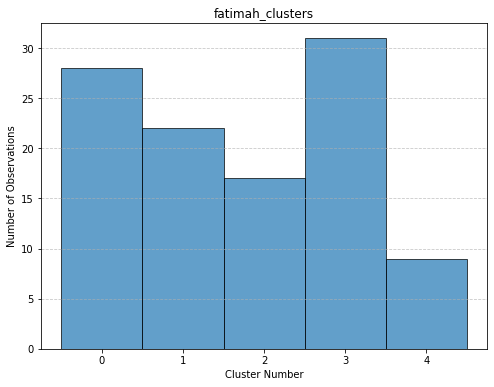


Number of Observations in Each Cluster:
3    31
0    28
1    22
2    17
4     9
Name: cluster_fatimah, dtype: int64


In [3]:
# Build a model    

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the standardized dataframe
df2_fatimah_standardized = pd.read_csv('df2_fatimah_standardized.csv')

# Perform K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df2_fatimah_standardized['cluster_fatimah'] = kmeans.fit_predict(df2_fatimah_standardized)

# Plot a histogram of the clusters
plt.figure(figsize=(8, 6))
plt.hist(df2_fatimah_standardized['cluster_fatimah'], bins=range(6), align='left', edgecolor='black', alpha=0.7)
plt.title("fatimah_clusters")
plt.xlabel("Cluster Number")
plt.ylabel("Number of Observations")
plt.xticks(range(5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the number of observations in each cluster
cluster_counts = df2_fatimah_standardized['cluster_fatimah'].value_counts()
print("\nNumber of Observations in Each Cluster:")
print(cluster_counts)